## Worksheet 6

Problem 4:

<img src="./problem_4_ws_6.JPG" alt="Drawing" style="width: 400px;"/>

Problem 5:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

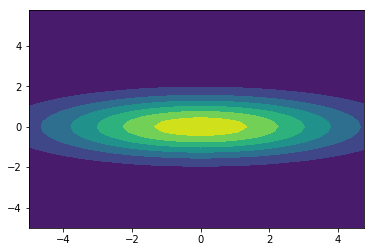

In [3]:
# Problem a)
%matplotlib inline

x, y = np.mgrid[-5:5:.25, -5:6:.25]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0, 0], [[9.0, 0.0], [0.0, 1.0]])
plt.contourf(x, y, rv.pdf(pos))

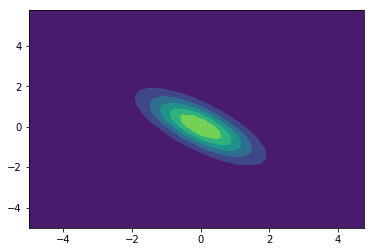

In [4]:
# Problem b)
x, y = np.mgrid[-5:5:.25, -5:6:.25]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0, 0], [[1.0, -0.75], [-0.75, 1.0]])
plt.contourf(x, y, rv.pdf(pos))

## Worksheet 8

Problem 4:

In [5]:
# Imported Code from Professor:
from struct import unpack
import numpy as np
import matplotlib.pylab as plt 

def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

In [12]:
# Problem a)
# Train
train_images = "/Users/kkannapp/Documents/DSE/DSE210-homework/day_3/train-images-idx3-ubyte"
train_labels = "/Users/kkannapp/Documents/DSE/DSE210-homework/day_3/train-labels-idx1-ubyte"
# Test
test_images = "/Users/kkannapp/Documents/DSE/DSE210-homework/day_3/t10k-images-idx3-ubyte"
test_labels = "/Users/kkannapp/Documents/DSE/DSE210-homework/day_3/t10k-labels-idx1-ubyte"

x,y = loadmnist(train_images,train_labels)
test_x,test_y = loadmnist(test_images,test_labels)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

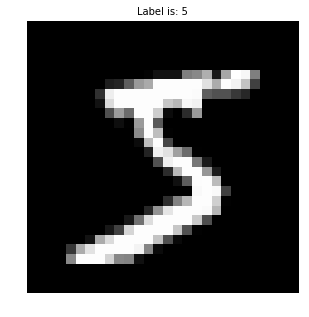

(60000, 784)
(60000,)


In [18]:
# Preview the data:
print(x[0])
plt.figure(figsize=(10,5))
plt.title('Label is: %i' % (y[0]), fontsize = 10)
displaychar(x[0])
print(x.shape)
print(y.shape)

In [19]:
# Problem b)
from sklearn.model_selection import train_test_split

# Split training into train and validation
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.16666666666, random_state=1)
print('Training set shape',train_x.shape)
print('Training label shape',train_y.shape)
print('Validation set shape',valid_x.shape)
print('Validation label shape',valid_y.shape)

Training set shape (50000, 784)
Training label shape (50000,)
Validation set shape (10000, 784)
Validation label shape (10000,)


In [20]:
# Problem c)
# Leverage a library found at http://www.eggie5.com/68-mnist-gaussian-classifier to help with the classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x, train_y)

GaussianNB(priors=None)

In [21]:
# Leverage library to gather prior probabilities
prior_prob = gnb.class_prior_
nums = len(prior_prob)
for i in range(nums):
    perc = (prior_prob[i])
    print('The class probability of image %s is' %i, '{0:.4f}'.format(perc))

The class probability of image 0 is 0.0994
The class probability of image 1 is 0.1118
The class probability of image 2 is 0.0996
The class probability of image 3 is 0.1020
The class probability of image 4 is 0.0972
The class probability of image 5 is 0.0901
The class probability of image 6 is 0.0981
The class probability of image 7 is 0.1042
The class probability of image 8 is 0.0978
The class probability of image 9 is 0.0997


In [22]:
# Gather classes data groups, for use in generating class-wise statistics:
classes = gnb.classes_

def groups(class_id):
    grouping = []
    for i, group in enumerate(train_x):
        if train_y[i] == class_id:
            grouping.append(group)
    grouping = np.matrix(grouping)
    return grouping

# Create covariance matrices and means, by class - use to calculate Gaussians:
post_prob = []
for c in classes:
    grouping = groups(c)
    mean_x = np.array(grouping.mean(0))[0]
    cov_x = np.cov(grouping.T)
    Px = multivariate_normal(mean_x, cov_x, allow_singular=True)
    post_prob.append(Px)

In [23]:
# Now fit a Gaussian with a Naive Bayes classifier:
Y = []
for i in test_x:
    bayes_prob = []
    for c in classes:
        fin_prob = [c, np.log(prior_prob[c]) + post_prob[c].logpdf(i)]
        bayes_prob.append(fin_prob)
    prediction = max(bayes_prob, key= lambda a: a[1])
    Y.append(prediction[0])

In [25]:
# Accuracy without smoothing yields 81%, pretty good fit considering there was no additional attempt to fit the data

miss = (test_y != Y).sum()
total = test_x.shape[0]
print("Accuracy: = %f" %(100*((total-miss)/total)),'%')

Accuracy: = 81.380000 %


In [26]:
# Now let us get to part d), where we add a smoothing component to the class variances to provide a better fit
# Do not disrupt co-variances, as to just increase variance along the diagonal
# Observed output and selected relevant c's to demonstrate selection...

In [27]:
constant = [1,1000,1500,2100,2300,2400,2500,2600,2700,2800,3500,4000]
error_rates = []
for co in constant:
    post_prob = []
    for c in classes:
        grouping = groups(c)
        meanx = np.array(grouping.mean(0))[0]
        covx = np.cov(grouping, rowvar=0)
        cov_smoothed = covx + (co * np.eye(meanx.shape[0]))
        p_x = multivariate_normal(meanx, cov_smoothed, allow_singular=True)
        post_prob.append(p_x)

    Y = []
    for x in valid_x:
        bayes_prob = []
        for c in classes:
            fin_prob = [c, np.log(prior_prob[c]) + post_prob[c].logpdf(x)]
            bayes_prob.append(fin_prob)
        prediction = max(bayes_prob, key= lambda a: a[1])
        Y.append(prediction[0])

    miss = (valid_y != Y).sum()
    total = valid_x.shape[0]
    error_rate = 100*(miss/float(total))
    error_rates.append(error_rate)
    print("Error rate for c= %s: %d/%d = %f" %((co, miss, total, error_rate)),'%')

Error rate for c= 1: 1641/10000 = 16.410000 %
Error rate for c= 1000: 532/10000 = 5.320000 %
Error rate for c= 1500: 521/10000 = 5.210000 %
Error rate for c= 2100: 510/10000 = 5.100000 %
Error rate for c= 2300: 502/10000 = 5.020000 %
Error rate for c= 2400: 498/10000 = 4.980000 %
Error rate for c= 2500: 496/10000 = 4.960000 %
Error rate for c= 2600: 490/10000 = 4.900000 %
Error rate for c= 2700: 489/10000 = 4.890000 %
Error rate for c= 2800: 490/10000 = 4.900000 %
Error rate for c= 3500: 496/10000 = 4.960000 %
Error rate for c= 4000: 501/10000 = 5.010000 %


In [28]:
print("The best c value for me was c= 2700","with a error rate of:",min(error_rates), "%")

The best c value for me was c= 2700 with a error rate of: 4.89 %


In [29]:
# Part e) Submit code, use value of c on test set, and pick 5 misclassified

In [30]:
# Replicate part d, replace validation set with test set 
constant = 2700
post_prob = []
for c in classes:
    grouping = groups(c)
    meanx = np.array(grouping.mean(0))[0]
    covx = np.cov(grouping, rowvar=0)
    cov_smoothed = covx + (constant * np.eye(meanx.shape[0]))
    p_x = multivariate_normal(meanx, cov_smoothed, allow_singular=True)
    post_prob.append(p_x)

Y = []
for x in test_x:
    bayes_prob = []
    for c in classes:
        fin_prob = [c, np.log(prior_prob[c]) + post_prob[c].logpdf(x)]
        bayes_prob.append(fin_prob)
    prediction = max(bayes_prob, key= lambda a: a[1])
    Y.append(prediction[0])

miss = (test_y != Y).sum()
total = test_x.shape[0]
error_rate = 100*(miss/float(total))
error_rates.append(error_rate)
print("Error rate for c= %s: %d/%d = %f" %((constant, miss, total, error_rate)),'%')

Error rate for c= 2700: 437/10000 = 4.370000 %


In [31]:
index_error = np.array(np.where((test_y != Y)==True))[0]

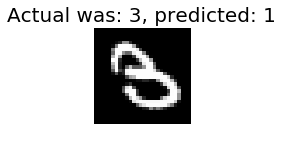

Probabality of each number:  [[0, -4215.2891664339231], [1, -4629.7571621129564], [2, -4105.2901396427023], [3, -4095.931391819704], [4, -4263.1841211666951], [5, -4095.4077813197209], [6, -4233.0732500719905], [7, -4357.7579388352951], [8, -4131.7789077268772], [9, -4344.2013725066945]]


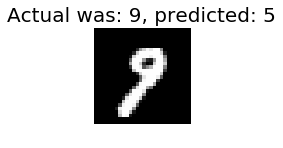

Probabality of each number:  [[0, -4126.0736693739054], [1, -4099.1776924240921], [2, -4072.1907010294735], [3, -4066.9578857708052], [4, -4060.5950400397396], [5, -4101.7520958890245], [6, -4208.0419275755421], [7, -3991.100838092621], [8, -4022.446439636909], [9, -3998.0407613761818]]


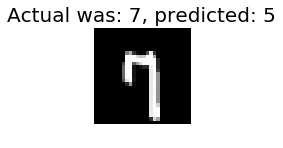

Probabality of each number:  [[0, -4153.7620084166192], [1, -4214.5211688603258], [2, -4132.5787840242028], [3, -4088.2483185010133], [4, -4031.2933114995917], [5, -4080.699394673934], [6, -4218.4273529964221], [7, -3987.6319971129283], [8, -4075.3021861965562], [9, -3985.8097510687999]]


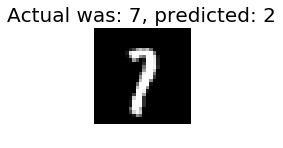

Probabality of each number:  [[0, -4095.6362065586577], [1, -3954.1446728082788], [2, -4021.7226219262907], [3, -4036.7222108019023], [4, -4006.5720426082648], [5, -4071.6996770627416], [6, -4116.5929845262863], [7, -3963.3427010867795], [8, -3997.7145741899608], [9, -3988.4405974630827]]


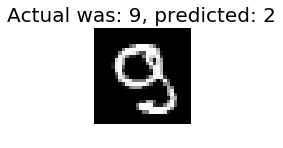

Probabality of each number:  [[0, -4179.2841727026398], [1, -4497.9209520738677], [2, -4132.1600255518124], [3, -4127.2495841448781], [4, -4144.0442616681084], [5, -4128.1875970699648], [6, -4312.6725162652974], [7, -4232.3051452658665], [8, -4096.9172482615695], [9, -4119.8608190534742]]


In [35]:
incorrect = index_error[:5]
actual = test_y[incorrect]
miss = []
for x in incorrect:
    bayes_prob = []
    for c in classes:
        fin_prob = [c, np.log(prior_prob[c]) + post_prob[c].logpdf(x)]
        bayes_prob.append(fin_prob)
    prediction = max(bayes_prob, key= lambda a: a[1])
    miss.append(prediction[0])

count = 0
for i in range(len(incorrect)):
    bayes_prob = []
    for c in classes:
        fin_prob = [c, np.log(prior_prob[c]) + post_prob[c].logpdf(test_x[incorrect[i]])]
        bayes_prob.append(fin_prob)
    count += 1    
    plt.figure(figsize=(10,5))
    plt.subplot(1, 5, count)
    plt.title('Actual was: %i, predicted: %i' % (actual[i], miss[i]), fontsize = 20)
    displaychar(test_x[incorrect[i]])
    print("Probabality of each number: ",bayes_prob)